In [ ]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import derivative
from scipy.signal import find_peaks
from statistics import stdev,mean
import itertools as itr
import math
from google.colab.patches import cv2_imshow
import pprint, pickle
from scipy.stats import binom
from scipy import signal

# definition


In [ ]:
def lenght(x1,x2,y1,y2,z1,z2):
    output=(math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2))
    return output
def upper_body(x11,x12,x23,x24,y11,y12,y23,y24,z11,z12,z23,z24):
    output=math.sqrt((((x11+x12)/2)-((x23+x24)/2))**2+(((y11+y12)/2)-((y23+y24)/2))**2+(((z11+z12)/2)-((z23+z24)/2))**2)
    return output
def shoulder(k):
    l_xy=lenght(key_array[k][11][0],key_array[k][12][0],key_array[k][11][1],key_array[k][12][1],0,0)
    return l_xy
def hip_size(k):
    l_xy=lenght(key_array[k][24][0],key_array[k][23][0],key_array[k][24][1],key_array[k][23][1],0,0)
    return l_xy
def thigh_r(k):
    l_xy=lenght(key_array[k][24][0],key_array[k][26][0],key_array[k][24][1],key_array[k][26][1],0,0)
    return l_xy
def thigh_l(k):
    l_xy=lenght(key_array[k][23][0],key_array[k][25][0],key_array[k][23][1],key_array[k][25][1],0,0)
    return l_xy
def shank_r(k):
    l_xy=lenght(key_array[k][28][0],key_array[k][26][0],key_array[k][26][1],key_array[k][28][1],0,0)
    return l_xy
def shank_l(k):
    l_xy=lenght(key_array[k][27][0],key_array[k][25][0],key_array[k][27][1],key_array[k][25][1],0,0)
    return l_xy
def ankle_to_heel_r(k):
    l_xy=lenght(key_array[k][28][0],key_array[k][30][0],key_array[k][28][1],key_array[k][30][1],0,0)
    return l_xy
def ankle_to_heel_l(k):
    l_xy=lenght(key_array[k][27][0],key_array[k][29][0],key_array[k][27][1],key_array[k][29][1],0,0)
    return l_xy
def upper_arm_r(k):
    l_xy=lenght(key_array[k][12][0],key_array[k][14][0],key_array[k][12][1],key_array[k][14][1],0,0)
    return l_xy
def upper_arm_l(k):
    l_xy=lenght(key_array[k][11][0],key_array[k][13][0],key_array[k][11][1],key_array[k][13][1],0,0)
    return l_xy
def lower_arm_r(k):
    l_xy=lenght(key_array[k][16][0],key_array[k][14][0],key_array[k][16][1],key_array[k][14][1],0,0)
    return l_xy
def lower_arm_l(k):
    l_xy=lenght(key_array[k][15][0],key_array[k][13][0],key_array[k][15][1],key_array[k][13][1],0,0)
    return l_xy
def palm_to_finger_r(k):
    l_xy=lenght(key_array[k][16][0],key_array[k][20][0],key_array[k][16][1],key_array[k][20][1],0,0)
    return l_xy
def palm_to_finger_l(k):
    l_xy=lenght(key_array[k][15][0],key_array[k][19][0],key_array[k][15][1],key_array[k][19][1],0,0)
    return l_xy
def face_width(k):
    l_xy=lenght(key_array[k][7][0],key_array[k][8][0],key_array[k][7][1],key_array[k][8][1],0,0)
    return l_xy
def mouth_width(k):
    l_xy=lenght(key_array[k][9][0],key_array[k][10][0],key_array[k][9][1],key_array[k][10][1],0,0)
    return l_xy
def eye_size(k):
    l_xy=lenght(key_array[k][4][0],key_array[k][6][0],key_array[k][4][1],key_array[k][6][1],0,0)
    return l_xy
def eyes_midpoints(k):
    l_xy=lenght(key_array[k][5][0],key_array[k][2][0],key_array[k][5][1],key_array[k][2][1],0,0)
    return l_xy
def ubl(k):
    l_xy=upper_body(key_array[k][11][0],key_array[k][12][0],key_array[k][23][0],key_array[k][24][0],key_array[k][11][1],key_array[k][12][1],key_array[k][23][1],key_array[k][24][1],0,0,0,0)
    return l_xy
def center(k):
    cent=(key_array[k][11][1]+key_array[k][12][1]+key_array[k][23][1]+key_array[k][24][1])/4
    return cent
def max_avg(s1,s2,y_data):
    pk = np.array(y_data[peaks])
    avg = []
    for i in range(s1,(s2+1)):
        avg.append(pk[i])
    max_avg = sum(avg)/len(avg)
    return max_avg
def peak_mode(peak_li):
    li=[]
    for i in range(len(peak_li[peaks])):
        li.append(peak_li[peaks[i]])
    m=(max(set(li), key = li.count))
    #l=[round(num,4) for num in li]
    return m
def avrgmode(li,r):
    lis=[]
    for i in range(r):
        m=(max(set(li), key = li.count))
        li.remove(m)
        lis.append(m)
    return sum(lis)/len(lis)
def sample(df,y,time_return_points):
    a = np.array(df.t)
    sample_data=[]
    for i in range(len(time_return_points)-1):
        index=np.where(np.logical_and(a>=time_return_points.t[i], a<=time_return_points.t[i+1]))
        s = list(map(lambda a : y[a], index[0]))
        sample_data.append(s)
    return sample_data
def avrg_value(direction_lis,a,b):
    li=[]
    for k in range(len(direction_lis)):
        df = pd.DataFrame(direction_lis[k],columns=['xy'])
        min_thresold,max_thresold=df.xy.quantile([a,b])
        real_set=df.xy[(df.xy>min_thresold)&(df.xy<max_thresold)]
        avre=real_set.mean()
        li.append(avre)
    return (li)
def comb_dir_arrays(plus_array,minus_array,plus,minus):   
    if plus<minus:
        array=com(plus_array,minus_array)
    elif plus>minus:
        array=com(minus_array,plus_array)
    return array
def max_avg(s1,s2,y_data):
    pk = np.array(y_data[peaks])
    avg = []
    for i in range(s1,(s2+1)):
        avg.append(pk[i])
    max_avg = sum(avg)/len(avg)
    return max_avg
def com(A,B):
    if type(A)==np.ndarray:
        C= A.tolist()
    else:
        C=A
    for i,v in enumerate(B):
        C.insert(2*i+1,v) 
    return C
    


Define feature vector array

In [ ]:
S_f=[[None],[None],[None],[None,None],[None,None],[None,None],[None,None],[None,None],[None],[None],[None],[None]]

Upper body height

In [ ]:
H=[]
for i in range(len(key_array)):
    #time
    t=key_array[i][12][3]
    #upper body height
    ubh=abs((key_array[i][11][1]+key_array[i][12][1])-(key_array[i][23][1]+key_array[i][24][1]))/2
    #shoulder length
    sl=abs(key_array[i][11][0]-key_array[i][12][0])
    #center of upper body in depth
    center=(key_array[i][11][2]+key_array[i][12][2]+key_array[i][23][2]+key_array[i][24][2])/4
    
    #
    heel_r=abs(key_array[i][24][1]-key_array[i][30][1])
    foot_index_r=abs(key_array[i][24][1]-key_array[i][32][1])
    heel_l=abs(key_array[i][23][1]-key_array[i][29][1])
    foot_index_l=abs(key_array[i][23][1]-key_array[i][31][1])
    #sldir=key_array[i][11][0]-key_array[i][12][0]
    right=key_array[i][12][0]
    left=key_array[i][11][0]
    H.append([ubh])
    H[i].append(t)
    H[i].append(sl)
    H[i].append(sl/ubh)
    H[i].append(center)
    H[i].append(right)
    H[i].append(left)
    #H[i].append(sldir)
H_array = np.array(H)
print(H_array)

df = pd.DataFrame(H_array,columns=['ubh','t','sl','sln','center','r_sdr','l_sdr'])
print(df)

df.plot(x ='t', y='ubh', kind = 'line',figsize=(100,5))
plt.show()

plt.figure(figsize=(100,5))
plt.plot(df.t,df.sl,'b')
plt.plot(df.t,df.sln,'r')
plt.ylim(0,0.6)
plt.show()

[[ 7.42471963e-02  4.26143646e-01  5.17968535e-02 ... -8.83967052e-02
   5.79971492e-01  6.31768346e-01]
 [ 7.38682002e-02  5.40990829e-01  5.20524383e-02 ... -7.70398382e-02
   5.79688966e-01  6.31741405e-01]
 [ 7.34339803e-02  6.52039766e-01  5.22214770e-02 ... -7.81030701e-02
   5.79522312e-01  6.31743789e-01]
 ...
 [ 6.96534365e-02  4.19829287e+03  4.83658910e-02 ... -5.39351497e-02
   5.59131026e-01  6.07496917e-01]
 [ 7.00183511e-02  4.19841540e+03  4.88811135e-02 ... -5.01719313e-02
   5.59003830e-01  6.07884943e-01]
 [ 7.03947842e-02  4.19853202e+03  4.92539406e-02 ... -4.83354907e-02
   5.58952808e-01  6.08206749e-01]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


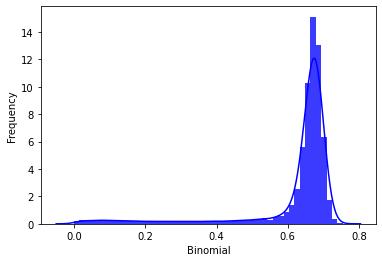

In [ ]:
data=df.sln
ax=sns.distplot(data,
                kde=True,
                color='blue',
                hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='Binomial',ylabel='Frequency')
plt.show()

b, a = signal.butter(1, 0.1, btype='lowpass', analog=False)
low_passed = signal.filtfilt(b, a, df.ubh)

plt.figure(figsize=(100,5))
plt.plot(df.t,low_passed)
plt.show()

Walking Direction

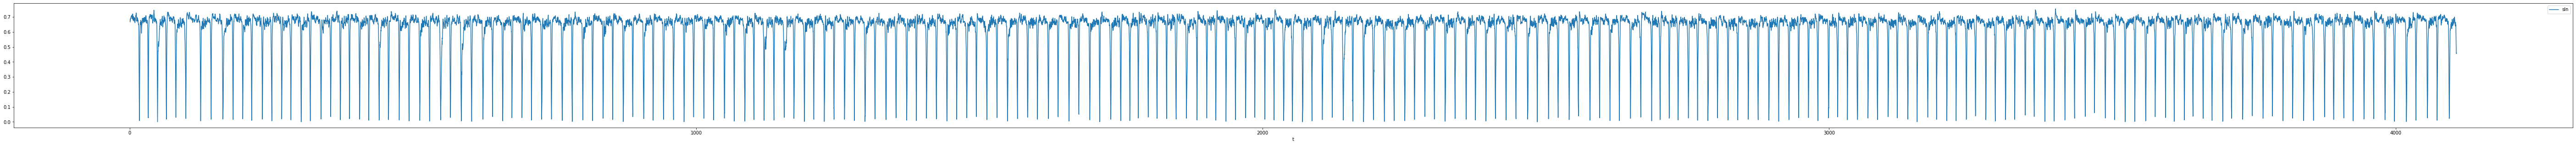

In [ ]:
df.plot(x ='t', y='sln', kind = 'line',figsize=(100,5))
#plt.ylim(0,0.2)
plt.show()

return_points,_=find_peaks(-df.sln,prominence=0.65)
time_return_points=pd.DataFrame(df.t[return_points],columns=['t']).reset_index()
print(time_return_points)
plt.figure(figsize=(100,5))
plt.plot(df.t,df.sln)
plt.plot(df.t[return_points], df.sln[return_points],"X",markerfacecolor='red',markersize=8)
plt.show()

return_points_L =return_points[1::2]

plt.figure(figsize=(100,5))
plt.plot(df.t,df.r_sdr,'r')
plt.plot(df.t,df.l_sdr,'b')
plt.plot(df.t[return_points], df.r_sdr[return_points],"X",markerfacecolor='red',markersize=8)
plt.plot(df.t[return_points], df.l_sdr[return_points],"X",markerfacecolor='black',markersize=8)
plt.show()

#if right shoulder value <left shoulder ,then man walking towards(front)

from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(df.t, df.r_sdr, k=4, s=0)
r_sdr_diff= spl.derivative()
spl = UnivariateSpline(df.t, df.l_sdr, k=4, s=0)
l_sdr_diff= spl.derivative()

plt.figure(figsize=(100,5))
plt.ylim(-0.25,0.25)
plt.plot(df.t,r_sdr_diff(df.t),'r')
plt.plot(df.t,l_sdr_diff(df.t),'b')
plt.plot(df.t[return_points], r_sdr_diff(df.t)[return_points],"X",markerfacecolor='green',markersize=8)
plt.plot(df.t[return_points], l_sdr_diff(df.t)[return_points],"X",markerfacecolor='black',markersize=8)
plt.show()

diff_r=r_sdr_diff(df.t)[return_points]
diff_l=l_sdr_diff(df.t)[return_points]

if diff_r[0]>diff_l[0]:
    return_points_front = return_points[::2]
    return_points_back = return_points[1::2]
    plus = 1
    minus = 0
elif diff_l[0]>diff_r[0]:
    return_points_front = return_points[1::2]
    return_points_back = return_points[::2]
    plus = 0
    minus = 1
else:
    print('error')

## fS1- Lengths of  lower body

In [ ]:
lb=[]
for i in range(len(key_array)):
    t=key_array[i][11][3]
    l_xy=(thigh_r(i)+shank_r(i)+ankle_to_heel_r(i))/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    lb.append([l_xy])
    lb[i].append(right)
    lb[i].append(left)
    lb[i].append(t)
ratio_ub_lb=np.array(lb) 
df_lb = pd.DataFrame(ratio_ub_lb[4:],columns=['l_xy','r_sdr','l_sdr','t'])
print(df_lb)

df_forward=df_lb[df.r_sdr < df.l_sdr] 
df_backward=df_lb[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

forward_lb_avrg=avrg_value(forward_instants,0.3,0.90)
backward_lb_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_lb_avrg)
print (backward_lb_avrg)

lbl_forward=list((map(lambda a : np.mean(a), forward_lb_avrg[plus::2])))
lbl_backward=list((map(lambda a : np.mean(a),backward_lb_avrg[minus::2])))
print(lbl_forward)
print('\n')
print(lbl_backward)

S1=comb_dir_arrays(lbl_forward,lbl_backward,plus,minus)
print (S1)
print (len(S1))
S_f[0]=S1
print(S_f)


           l_xy     r_sdr     l_sdr            t
0      1.524039  0.545776  0.596032     1.117545
1      1.530762  0.546275  0.596694     1.211973
2      1.519676  0.546821  0.597606     1.305191
3      1.486644  0.547285  0.598242     1.403430
4      1.490042  0.547795  0.598613     1.489529
...         ...       ...       ...          ...
41277  1.442667  0.579938  0.532675  4107.176623
41278  1.448797  0.575158  0.528326  4107.263378
41279  1.449887  0.573037  0.526198  4107.351717
41280  1.460793  0.572638  0.526157  4107.436967
41281  1.458806  0.572066  0.525584  4107.518179

[41282 rows x 4 columns]


## fS2-shoulder Length

           l_xy     r_sdr     l_sdr            t
0      0.681314  0.545776  0.596032     1.117545
1      0.686444  0.546275  0.596694     1.211973
2      0.692466  0.546821  0.597606     1.305191
3      0.695071  0.547285  0.598242     1.403430
4      0.693023  0.547795  0.598613     1.489529
...         ...       ...       ...          ...
41277  0.457145  0.579938  0.532675  4107.176623
41278  0.456147  0.575158  0.528326  4107.263378
41279  0.457825  0.573037  0.526198  4107.351717
41280  0.456953  0.572638  0.526157  4107.436967
41281  0.456516  0.572066  0.525584  4107.518179

[41282 rows x 4 columns]


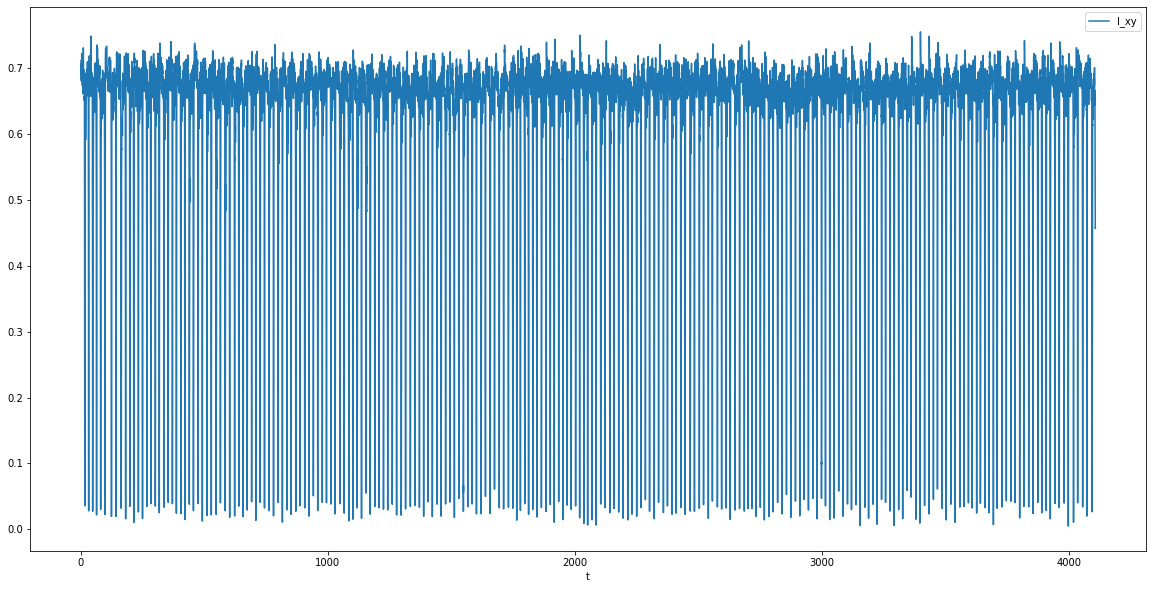

In [ ]:
sl=[]
for i in range(len(key_array)):
    t=key_array[i][11][3]
    l_xy=shoulder(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    sl.append([l_xy])
    sl[i].append(right)
    sl[i].append(left)
    sl[i].append(t)
shoulder_length=np.array(sl) 
df_sl = pd.DataFrame(shoulder_length[4:],columns=['l_xy','r_sdr','l_sdr','t'])
print(df_sl)
print("df_sl")
df_sl.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))

df_forward=df_sl[df.r_sdr < df.l_sdr] 
df_backward=df_sl[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_sl_avrg=avrg_value(forward_instants,0.3,0.90)
backward_sl_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_sl_avrg)
print (backward_sl_avrg)

sl_forward=list((map(lambda a : np.mean(a), forward_sl_avrg[plus::2])))
sl_backward=list((map(lambda a : np.mean(a),backward_sl_avrg[minus::2])))
print(sl_forward)
print('\n')
print(sl_backward)

S2=comb_dir_arrays(sl_forward,sl_backward,plus,minus)
print (S2)
print (len(S2))
S_f[1]=S1
print(S_f)


## fS3 Hip size

           l_xy     r_sdr     l_sdr            t
0      0.394528  0.545776  0.596032     1.117545
1      0.397498  0.546275  0.596694     1.211973
2      0.394706  0.546821  0.597606     1.305191
3      0.392870  0.547285  0.598242     1.403430
4      0.394808  0.547795  0.598613     1.489529
...         ...       ...       ...          ...
41277  0.303402  0.579938  0.532675  4107.176623
41278  0.305588  0.575158  0.528326  4107.263378
41279  0.306370  0.573037  0.526198  4107.351717
41280  0.304006  0.572638  0.526157  4107.436967
41281  0.301698  0.572066  0.525584  4107.518179

[41282 rows x 4 columns]


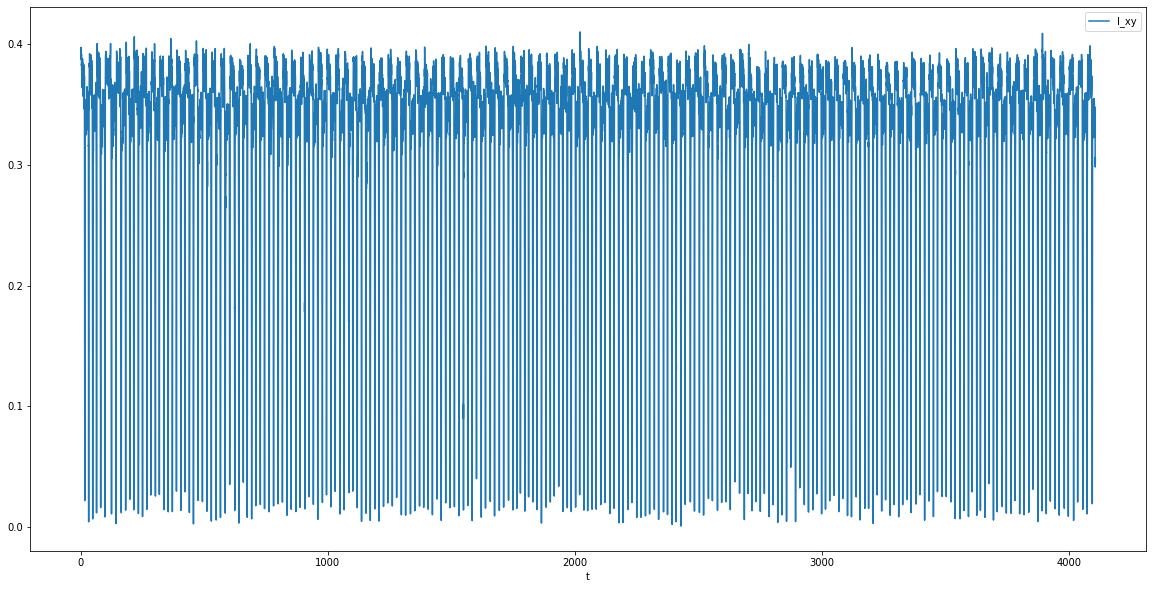

In [ ]:
hip=[]
for i in range(len(key_array)):
    t=key_array[i][23][3]
    l_xy=hip_size(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    hip.append([l_xy])
    hip[i].append(right)
    hip[i].append(left)
    hip[i].append(t)
hip_size=np.array(hip) 
df_hip = pd.DataFrame(hip_size[4:],columns=['l_xy','r_sdr','l_sdr','t'])
print("df_hip")
df_hip.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))

df_forward=df_hip[df.r_sdr < df.l_sdr] 
df_backward=df_hip[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

forward_hp_avrg=avrg_value(forward_instants,0.3,0.90)
backward_hp_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_hp_avrg)
print (backward_hp_avrg)

hp_forward=list((map(lambda a : np.mean(a), forward_hp_avrg[plus::2])))
hp_backward=list((map(lambda a : np.mean(a),backward_hp_avrg[minus::2])))
print(hp_forward)
print('\n')
print(hp_backward)

S3=comb_dir_arrays(hp_forward,hp_backward,plus,minus)
print (S3)
print (len(S3))
S_f[2]=S3
print(S_f)

## fS4-Length of upper arm(right hand)

         l_xy_r    l_xy_l     r_sdr     l_sdr            t
0      0.518664  0.505630  0.543409  0.595587     0.724078
1      0.535279  0.517635  0.543842  0.595584     0.825904
2      0.540980  0.522805  0.544403  0.595657     0.928155
3      0.545769  0.527065  0.545330  0.595792     1.025161
4      0.546518  0.526933  0.545776  0.596032     1.117545
...         ...       ...       ...       ...          ...
41281  0.410982  0.508815  0.579938  0.532675  4107.176623
41282  0.407281  0.514872  0.575158  0.528326  4107.263378
41283  0.419844  0.520691  0.573037  0.526198  4107.351717
41284  0.418196  0.524639  0.572638  0.526157  4107.436967
41285  0.402951  0.523995  0.572066  0.525584  4107.518179

[41286 rows x 5 columns]


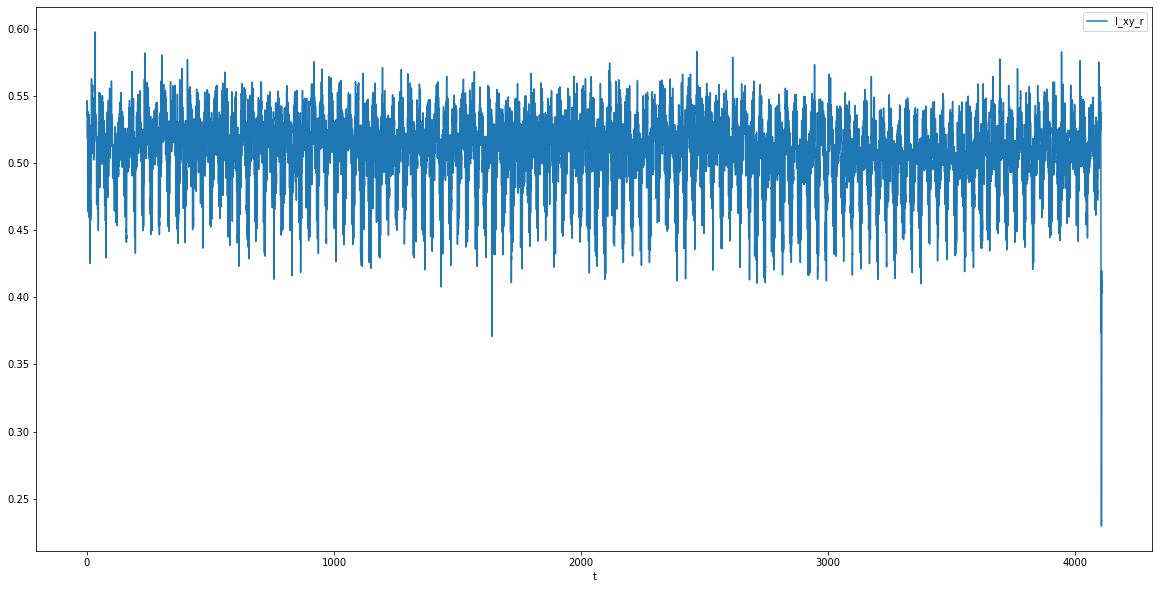

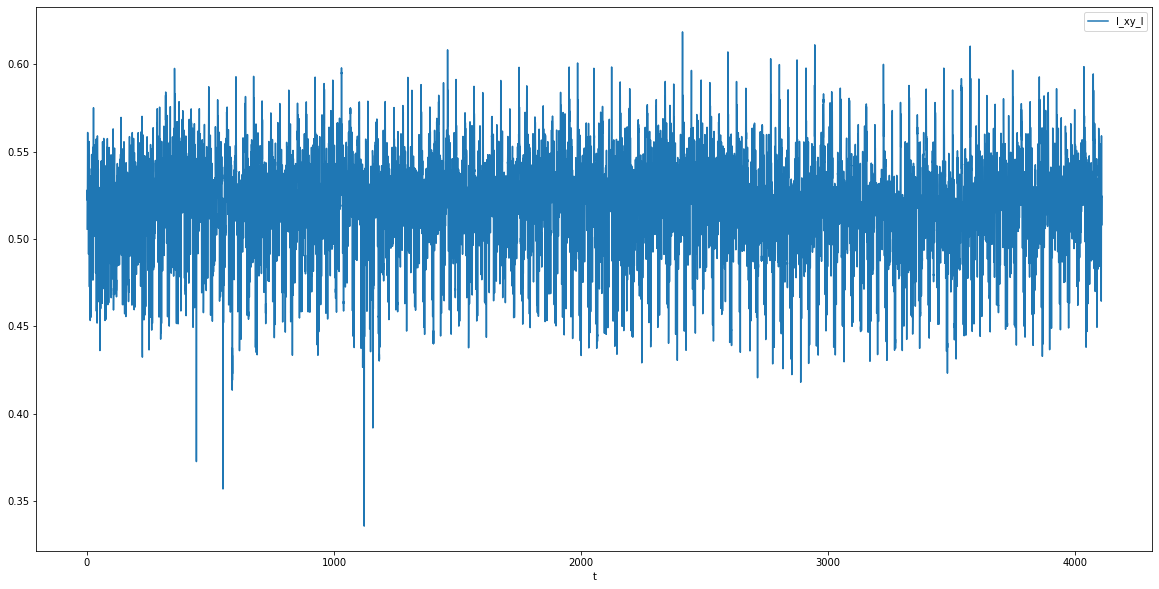

In [ ]:
u_arm=[]
for i in range(len(key_array)):
    t=key_array[i][12][3]
    l_xy_r=upper_arm_r(i)/ubl(i)
    l_xy_l=upper_arm_l(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    u_arm.append([l_xy_r])
    u_arm[i].append(l_xy_l)
    u_arm[i].append(right)
    u_arm[i].append(left)
    u_arm[i].append(t)
upper_arm=np.array(u_arm) 
df_u_arm = pd.DataFrame(upper_arm,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t'])
print("df_u_arm")
df_u_arm.plot(x ='t',y='l_xy_r' ,kind = 'line',figsize=(20,10))

df_forward=df_u_arm[df.r_sdr < df.l_sdr] 
df_backward=df_u_arm[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_instants=sample(df_forward,df_forward.l_xy_r,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_r,time_return_points)
print(forward_instants)
print(backward_instants)

forward_uarm_r_avrg=avrg_value(forward_instants,0.3,0.90)
backward_uarm_r_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_uarm_r_avrg)
print (backward_uarm_r_avrg)

uarm_forward_r=list((map(lambda a : np.mean(a), forward_uarm_r_avrg[plus::2])))
uarm_backward_r=list((map(lambda a : np.mean(a),backward_uarm_r_avrg[minus::2])))
print(uarm_forward_r)
print('\n')
print(uarm_backward_r)

S4=comb_dir_arrays(uarm_forward_r,uarm_backward_r,plus,minus)
print (S4)
print (len(S4))
S_f[3][0]=S4
print(S_f)


## fS5-Length of upper arm(Left hand)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_l,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_l,time_return_points)
print(forward_instants)
print(backward_instants)

forward_uarm_l_avrg=avrg_value(forward_instants,0.3,0.90)
backward_uarm_l_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_uarm_l_avrg)
print (backward_uarm_l_avrg)

uarm_forward_L=list((map(lambda a : np.mean(a), forward_uarm_l_avrg[plus::2])))
uarm_backward_L=list((map(lambda a : np.mean(a),backward_uarm_l_avrg[minus::2])))
print(uarm_forward_L)
print('\n')
print(uarm_backward_L)

S5=comb_dir_arrays(uarm_forward_L,uarm_backward_L,plus,minus)
print (S5)
print (len(S5))
S_f[3][1]=S5
print(S_f)

[[0.4736608368992335, 0.5186155540945419], [0.5186155540945419, 0.5142728746904289, 0.5118944941669995, 0.5182699407585202, 0.5370434707338846, 0.5379336995923367, 0.5325853288106822, 0.5269827247970766, 0.526479347487549, 0.5274755275686028, 0.5258610402814915, 0.5202243873775976, 0.518161967310505, 0.5199036366822006, 0.5135162252248711, 0.5086212235607259, 0.5018310473183453, 0.49368154554556776, 0.4887717397603699, 0.48531226866130245, 0.4859507323002357, 0.4805038604499346, 0.4821052101342594, 0.4857061986643446, 0.4895911014630212, 0.503207425752788, 0.514220161147627, 0.52027147791666, 0.5285606742150982, 0.5345447991192201, 0.5367613594056473, 0.5370182068892898, 0.5374080691084183, 0.5369207897269952, 0.5310019088438374, 0.5291654112259219, 0.5339892105734642, 0.5429313526974519, 0.5468322641586377, 0.5489205074643044, 0.5561993317182381, 0.5571815532700691, 0.5511415408315677, 0.5392391468010589, 0.531107768644775, 0.5070455633492535, 0.5042855493273339, 0.5007585525815073, 0

## fS6-Length of lower arm(right hand)

         l_xy_r    l_xy_l     r_sdr     l_sdr            t
0      0.432917  0.457762  0.543409  0.595587     0.724078
1      0.434676  0.453958  0.543842  0.595584     0.825904
2      0.435826  0.448509  0.544403  0.595657     0.928155
3      0.430748  0.441920  0.545330  0.595792     1.025161
4      0.428343  0.438623  0.545776  0.596032     1.117545
...         ...       ...       ...       ...          ...
41281  0.293247  0.499134  0.579938  0.532675  4107.176623
41282  0.186418  0.489525  0.575158  0.528326  4107.263378
41283  0.204355  0.481380  0.573037  0.526198  4107.351717
41284  0.168700  0.480460  0.572638  0.526157  4107.436967
41285  0.150835  0.484625  0.572066  0.525584  4107.518179

[41286 rows x 5 columns]


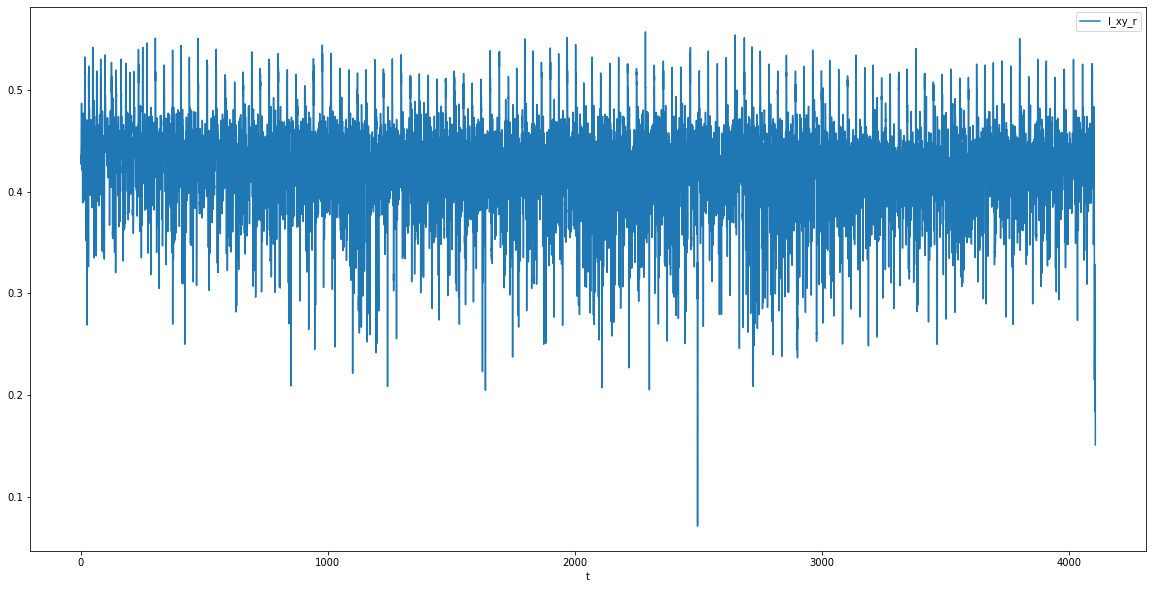

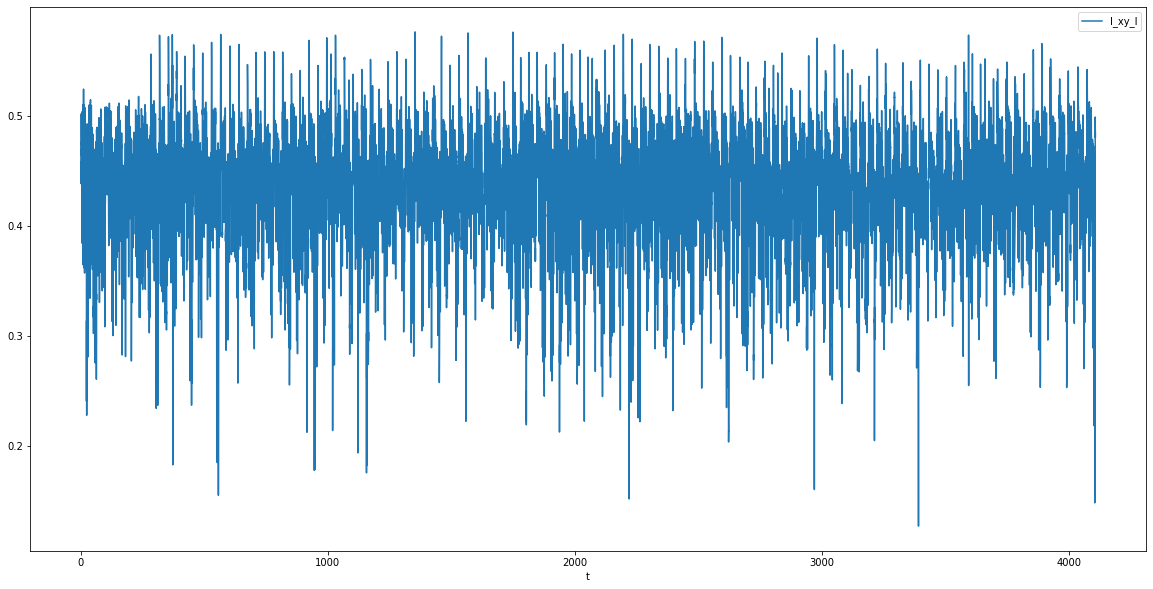

In [ ]:
l_arm=[]
for i in range(len(key_array)):
    t=key_array[i][14][3]
    l_xy_r=lower_arm_r(i)/ubl(i)
    l_xy_l=lower_arm_l(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    l_arm.append([l_xy_r])
    l_arm[i].append(l_xy_l)
    l_arm[i].append(right)
    l_arm[i].append(left)
    l_arm[i].append(t)
lower_arm=np.array(l_arm) 
df_l_arm = pd.DataFrame(lower_arm,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t'])
print(df_l_arm)
df_l_arm.plot(x ='t',y='l_xy_r' ,kind = 'line',figsize=(20,10))

df_forward=df_l_arm[df.r_sdr < df.l_sdr] 
df_backward=df_l_arm[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_instants=sample(df_forward,df_forward.l_xy_r,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_r,time_return_points)
print(forward_instants)
print(backward_instants)

forward_larm_r_avrg=avrg_value(forward_instants,0.3,0.90)
backward_larm_r_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_larm_r_avrg)
print (backward_larm_r_avrg)

larm_forward_r=list((map(lambda a : np.mean(a), forward_larm_r_avrg[plus::2])))
larm_backward_r=list((map(lambda a : np.mean(a),backward_larm_r_avrg[minus::2])))
print(larm_forward_r)
print('\n')
print(larm_backward_r)

S6=comb_dir_arrays(larm_forward_r,larm_backward_r,plus,minus)
print (S6)
print (len(S6))
S_f[4][0]=S6
print(S_f)


## fS7-Length of lower arm(left hand)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_l,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_l,time_return_points)
print(forward_instants)
print(backward_instants)

forward_larm_l_avrg=avrg_value(forward_instants,0.3,0.90)
backward_larm_l_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_larm_l_avrg)
print (backward_larm_l_avrg)

larm_forward_L=list((map(lambda a : np.mean(a), forward_larm_l_avrg[plus::2])))
larm_backward_L=list((map(lambda a : np.mean(a),backward_larm_l_avrg[minus::2])))
print(larm_forward_L)
print('\n')
print(larm_backward_L)

S7=comb_dir_arrays(larm_forward_L,larm_backward_L,plus,minus)
print (S7)
print (len(S7))
S_f[4][1]=S7
print(S_f)



[[0.44533092533795754, 0.45761103599192265], [0.45761103599192265, 0.46051117142650666, 0.4372140463817618, 0.4215206919680214, 0.4161266323997345, 0.4338895523948524, 0.4389155055929987, 0.4499658676387138, 0.4565018209840763, 0.48093912498595703, 0.4977029468542158, 0.5099813118047613, 0.5059642321289346, 0.5014804204288359, 0.4948017016772052, 0.47400466294158594, 0.45402779062518894, 0.4504767912649999, 0.43714210710329354, 0.41934109999847186, 0.4086077733604573, 0.38782050376058597, 0.38937159325675474, 0.391203786133295, 0.4296929993382679, 0.4540137746893226, 0.4701328121771042, 0.4717797525898113, 0.4796289745864934, 0.4808615210220194, 0.48468783259556447, 0.4848822775551387, 0.4808330332132826, 0.4733510948507831, 0.4678935174725775, 0.47311073542345217, 0.4818540789044156, 0.4951414667911372, 0.5064874815606056, 0.505466726831242, 0.4997406740987023, 0.492461755473757, 0.49721396935674955, 0.5088270387279561, 0.49035068166094803, 0.4720380930751929, 0.4474775315312236, 0.40

## fS8-Length of arm(right hand)
### (Upper arm + lower arm + palm to finger)


         l_xy_r    l_xy_l     r_sdr     l_sdr            t
0      0.214372  0.188179  0.543409  0.595587     0.724078
1      0.214261  0.207063  0.543842  0.595584     0.825904
2      0.210403  0.219696  0.544403  0.595657     0.928155
3      0.206918  0.230293  0.545330  0.595792     1.025161
4      0.207455  0.235077  0.545776  0.596032     1.117545
...         ...       ...       ...       ...          ...
41281  0.177520  0.240190  0.579938  0.532675  4107.176623
41282  0.148582  0.235460  0.575158  0.528326  4107.263378
41283  0.149712  0.238464  0.573037  0.526198  4107.351717
41284  0.138860  0.241019  0.572638  0.526157  4107.436967
41285  0.136182  0.242234  0.572066  0.525584  4107.518179

[41286 rows x 5 columns]


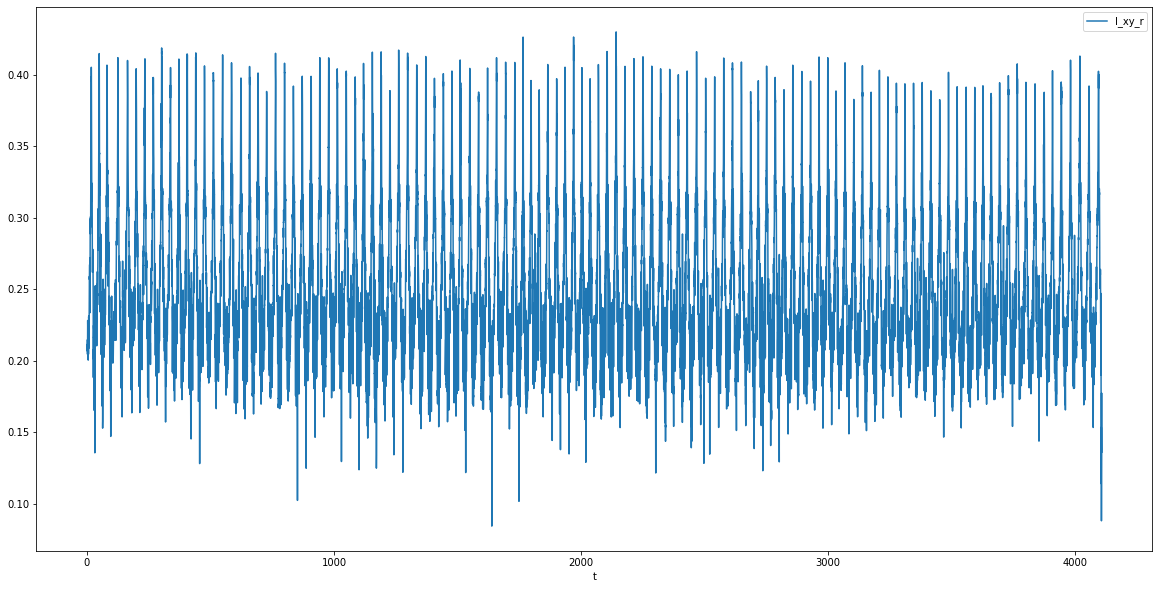

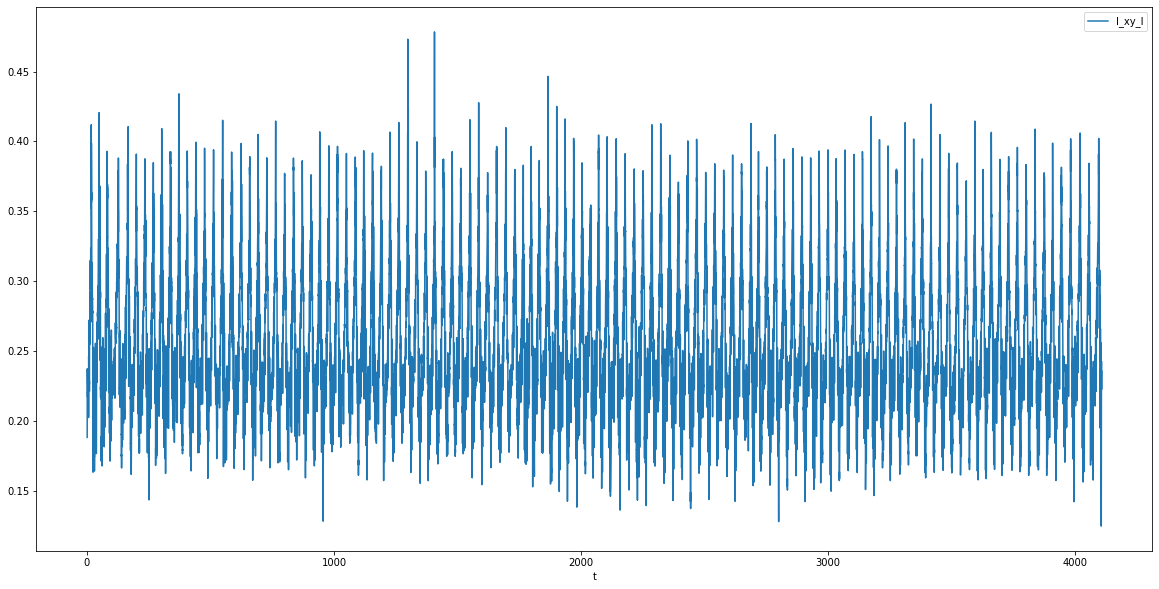

In [ ]:
arm=[]
for i in range(len(key_array)):
    t=key_array[i][12][3]
    l_xy_r=upper_arm_r(i)+lower_arm_r(i)+palm_to_finger_r(i)/ubl(i)
    l_xy_l=upper_arm_l(i)+lower_arm_l(i)+palm_to_finger_l(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    arm.append([l_xy_r])
    arm[i].append(l_xy_l)
    arm[i].append(right)
    arm[i].append(left)
    arm[i].append(t)
Length_of_arm=np.array(arm) 
df_arm = pd.DataFrame(Length_of_arm,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t'])
print(df_arm)
df_arm.plot(x ='t',y='l_xy_r' ,kind = 'line',figsize=(20,10))

df_forward=df_arm[df.r_sdr < df.l_sdr] 
df_backward=df_arm[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_instants=sample(df_forward,df_forward.l_xy_r,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_r,time_return_points)
print(forward_instants)
print(backward_instants)

forward_arm_r_avrg=avrg_value(forward_instants,0.3,0.90)
backward_arm_r_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_arm_r_avrg)
print (backward_arm_r_avrg)

arm_forward_r=list((map(lambda a : np.mean(a), forward_arm_r_avrg[plus::2])))
arm_backward_r=list((map(lambda a : np.mean(a),backward_arm_r_avrg[minus::2])))
print(arm_forward_r)
print('\n')
print(arm_backward_r)

S8=comb_dir_arrays(arm_forward_r,arm_backward_r,plus,minus)
print (S8)
print (len(S8))
S_f[5][0]=S8
print(S_f)


## fS9-Length of arm(left hand)
### (Upper arm + lower arm + palm to finger)


In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_l,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_l,time_return_points)
print(forward_instants)
print(backward_instants)

forward_arm_l_avrg=avrg_value(forward_instants,0.3,0.90)
backward_arm_l_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_arm_l_avrg)
print (backward_arm_l_avrg)

arm_forward_l=list((map(lambda a : np.mean(a), forward_arm_l_avrg[plus::2])))
arm_backward_l=list((map(lambda a : np.mean(a),backward_arm_l_avrg[minus::2])))
print(arm_forward_l)
print('\n')
print(arm_backward_l)

S9=comb_dir_arrays(arm_forward_l,arm_backward_l,plus,minus)
print (S9)
print (len(S9))
S_f[5][1]=S9
print(S_f)


[[0.38369358373546725, 0.23080055763913498], [0.23080055763913498, 0.2237551707406947, 0.22382213596308645, 0.22906249846123775, 0.22981845428616013, 0.22374080399727697, 0.22979053513235795, 0.2347197638645537, 0.24214941770994222, 0.2545759972094804, 0.254602315581386, 0.24883305479765006, 0.24975752618787564, 0.25433820551341224, 0.25552312853920306, 0.2496363412355332, 0.23012842136896297, 0.2166048634491579, 0.21373331243394023, 0.2074163160842008, 0.20744657935163852, 0.19219436940404852, 0.19555804274255967, 0.19797310004242707, 0.2094389780439846, 0.21538354489370903, 0.2267768211878438, 0.2299507202426098, 0.22633731461911363, 0.22963912666282899, 0.2325622976448369, 0.2313979128755158, 0.23129350667419613, 0.2294409514186827, 0.2281972984294668, 0.2256634619998648, 0.21937086994975152, 0.21251433097067315, 0.20812974216380573, 0.20829695240163523, 0.21224661596017347, 0.21413739949416938, 0.2148943545616324, 0.2161246772607096, 0.23039210297940763, 0.23763938049671463, 0.2472

## fS10-Length of thigh(Right)

         l_xy_r    l_xy_l     r_sdr     l_sdr            t
0      0.708347  0.653605  0.543409  0.595587     0.724078
1      0.727589  0.696320  0.543842  0.595584     0.825904
2      0.728894  0.707626  0.544403  0.595657     0.928155
3      0.735005  0.717883  0.545330  0.595792     1.025161
4      0.740897  0.720822  0.545776  0.596032     1.117545
...         ...       ...       ...       ...          ...
41281  0.608247  0.613430  0.579938  0.532675  4107.176623
41282  0.606897  0.630026  0.575158  0.528326  4107.263378
41283  0.606755  0.635757  0.573037  0.526198  4107.351717
41284  0.611248  0.644116  0.572638  0.526157  4107.436967
41285  0.614053  0.651960  0.572066  0.525584  4107.518179

[41286 rows x 5 columns]


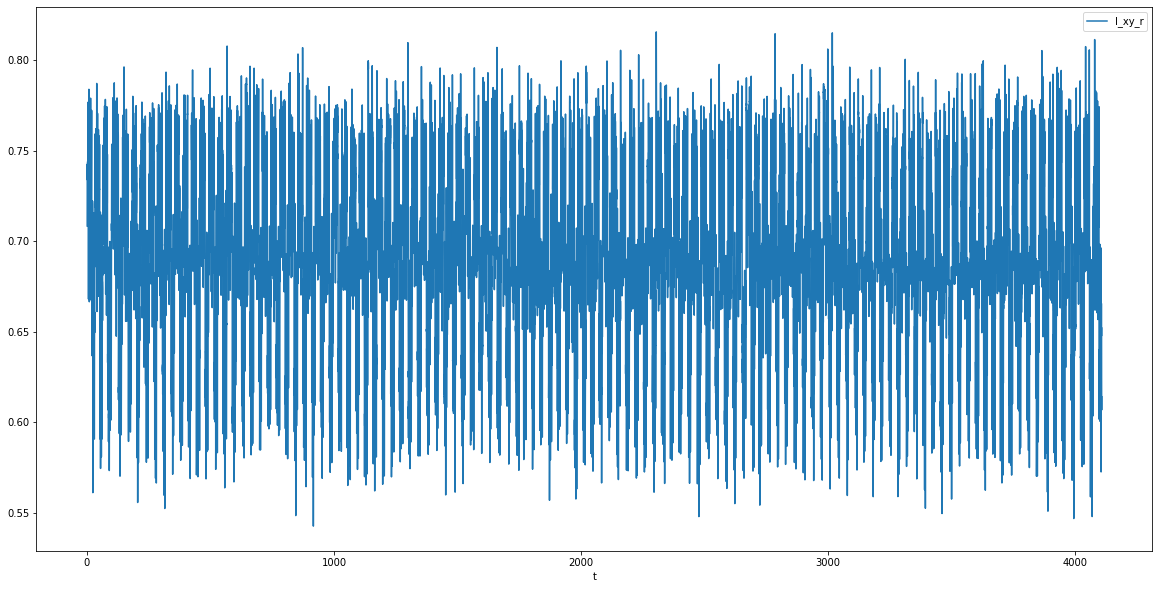

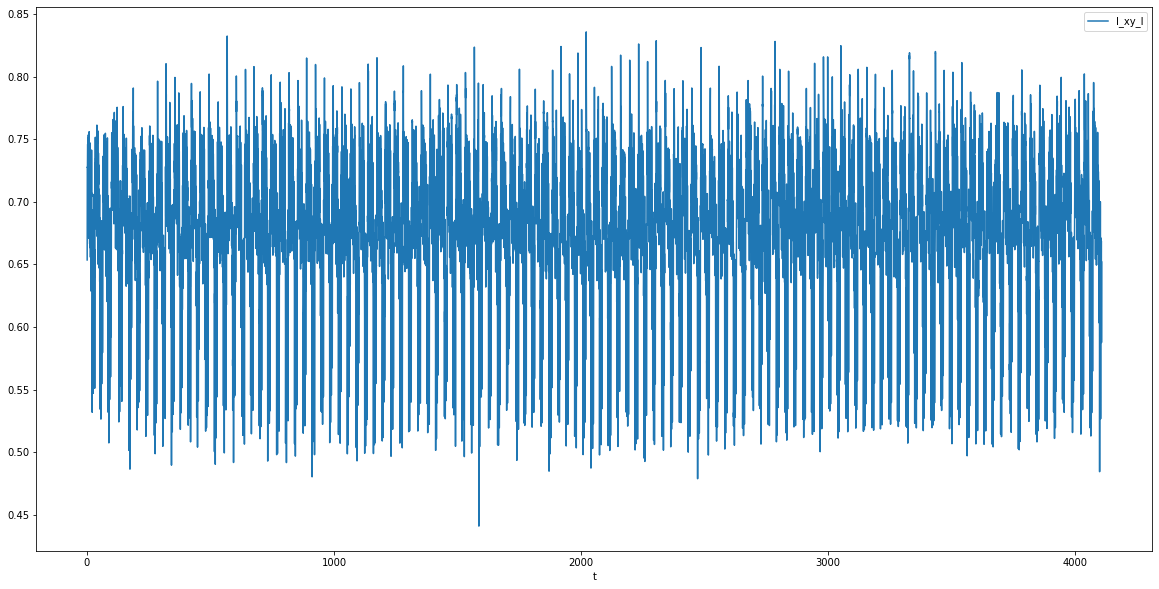

In [ ]:
th=[]
for i in range(len(key_array)):
    t=key_array[i][24][3]
    l_xy_r=thigh_r(i)/ubl(i)
    l_xy_l=thigh_l(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    th.append([l_xy_r])
    th[i].append(l_xy_l)
    th[i].append(right)
    th[i].append(left)
    th[i].append(t)
thigh=np.array(th) 
df_thigh= pd.DataFrame(thigh,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t'])
print(df_thigh)
df_thigh.plot(x ='t',y='l_xy_r' ,kind = 'line',figsize=(20,10))

df_forward=df_thigh[df.r_sdr < df.l_sdr] 
df_backward=df_thigh[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_instants=sample(df_forward,df_forward.l_xy_r,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_r,time_return_points)
print(forward_instants)
print(backward_instants)

forward_thigh_r_avrg=avrg_value(forward_instants,0.3,0.90)
backward_thigh_r_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_thigh_r_avrg)
print (backward_thigh_r_avrg)

thigh_forward_r=list((map(lambda a : np.mean(a), forward_thigh_r_avrg[plus::2])))
thigh_backward_r=list((map(lambda a : np.mean(a),backward_thigh_r_avrg[minus::2])))
print(thigh_forward_r)
print('\n')
print(thigh_backward_r)

S10=comb_dir_arrays(thigh_forward_r,thigh_backward_r,plus,minus)
print (S10)
print (len(S10))
S_f[6][0]=S10
print(S_f)

## fS11-Length of thigh(Left)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_l,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_l,time_return_points)
print(forward_instants)
print(backward_instants)

forward_thigh_l_avrg=avrg_value(forward_instants,0.3,0.90)
backward_thigh_l_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_thigh_l_avrg)
print (backward_thigh_l_avrg)

thigh_forward_l=list((map(lambda a : np.mean(a), forward_thigh_l_avrg[plus::2])))
thigh_backward_l=list((map(lambda a : np.mean(a),backward_thigh_l_avrg[minus::2])))
print(thigh_forward_l)
print('\n')
print(thigh_backward_l)

S11=comb_dir_arrays(thigh_forward_l,thigh_backward_l,plus,minus)
print (S11)
print (len(S11))
S_f[6][1]=S11
print(S_f)

[[0.6293359592495404, 0.7151576481230704], [0.7151576481230704, 0.7150570997434352, 0.7100683122423861, 0.6916886549920045, 0.7250911193630237, 0.7414204932334493, 0.7431195819636963, 0.7460653551650583, 0.7514981082091299, 0.7515932683763314, 0.7360185556715414, 0.7208946225739443, 0.7276366997023646, 0.7362383422704523, 0.7332191604416796, 0.7257149718033047, 0.7311232445061686, 0.7211205555207394, 0.7196808676054756, 0.7094740803865035, 0.7082708055190824, 0.7173851120449155, 0.7268817614820858, 0.7316574751976103, 0.7349275470307408, 0.7288563255128548, 0.7261174583224267, 0.7215776058144551, 0.7210430279679102, 0.7244794006404477, 0.7304657683833375, 0.7443230346019596, 0.7486655653224671, 0.7451300551044284, 0.7280276994557281, 0.7335164838038934, 0.7357540796384578, 0.7327817510126617, 0.7344418826212611, 0.728822643463456, 0.7256371549681924, 0.7262604847902921, 0.7272458873828153, 0.7231620137904828, 0.7266881890183234, 0.7305038917491038, 0.7398837514630336, 0.741771518650545

## fS12- Length of shank(right)

In [ ]:
shk=[]
for i in range(len(key_array)):
    t=key_array[i][26][3]
    l_xy_r=shank_r(i)/ubl(i)
    l_xy_l=shank_r(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    shk.append([l_xy_r])
    shk[i].append(l_xy_l)
    shk[i].append(right)
    shk[i].append(left)
    shk[i].append(t)
shank=np.array(shk) 
df_shk = pd.DataFrame(shank,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t'])
print(df_shk)
df_shk.plot(x ='t',y='l_xy_r' ,kind = 'line',figsize=(20,10))

df_forward=df_shk[df.r_sdr < df.l_sdr] 
df_backward=df_shk[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_shank_r_avrg=avrg_value(forward_instants,0.3,0.90)
backward_shank_r_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_shank_r_avrg)
print (backward_shank_r_avrg)

shank_forward_r=list((map(lambda a : np.mean(a), forward_shank_r_avrg[plus::2])))
shank_backward_r=list((map(lambda a : np.mean(a),backward_shank_r_avrg[minus::2])))
print(shank_forward_r)
print('\n')
print(shank_backward_r)

S12=comb_dir_arrays(shank_forward_r,shank_backward_r,plus,minus)
print (S12)
print (len(S12))
S_f[7][0]=S12
print(S_f)

[nan, 0.7018857677259238, nan, 0.6920262689511164, nan, 0.7000885242466834, nan, 0.6962314540388093, nan, 0.6902024269493382, nan, 0.6817272300246949, nan, 0.689446991972514, nan, 0.6800094127516996, nan, 0.6894157312888854, nan, 0.6963693838653171, nan, 0.6820199430312088, nan, 0.6937958717825711, nan, 0.6974545881176559, nan, 0.6898655376179714, nan, 0.689586165011908, nan, 0.700599270864374, nan, 0.6892204510988281, nan, 0.687923107574882, nan, 0.6893358377975396, nan, 0.6794532742420384, nan, 0.6956020872020721, nan, 0.6929876222423199, nan, 0.68337346793537, nan, 0.6863470590625699, nan, 0.6876986150138703, nan, 0.689107553974415, nan, 0.6936954431295498, nan, 0.6851830368809119, nan, 0.6866382120272727, nan, 0.6904712961830703, nan, 0.6832909158892753, nan, 0.6785370871603306, nan, 0.6853509983757765, nan, 0.6896463139023565, nan, 0.6847883171524215, nan, 0.6914024628949383, nan, 0.6876894516420711, nan, 0.6912568650648189, nan, 0.679592193602366, nan, 0.6884859418714561, nan, 0.

## fS13- Length of shank(left)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_l,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_l,time_return_points)
print(forward_instants)
print(backward_instants)

forward_shank_l_avrg=avrg_value(forward_instants,0.3,0.90)
backward_shank_l_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_shank_l_avrg)
print (backward_shank_l_avrg)

shank_forward_l=list((map(lambda a : np.mean(a), forward_shank_l_avrg[plus::2])))
shank_backward_l=list((map(lambda a : np.mean(a),backward_shank_l_avrg[minus::2])))
print(shank_forward_l)
print('\n')
print(shank_backward_l)

S13=comb_dir_arrays(shank_forward_r,shank_backward_r,plus,minus)
print (S13)
print (len(S13))
S_f[7][1]=S13
print(S_f)


[[0.7132818590516405, 0.7236532695296908], [0.7236532695296908, 0.7305130419261731, 0.7316326332479791, 0.7299106390676435, 0.7297110129227994, 0.7484233068541221, 0.7459617017946086, 0.739222603989877, 0.7375982544869626, 0.7409325694337998, 0.7369589084311777, 0.7315329703637439, 0.7415010466711699, 0.7426815554671338, 0.7389117896079864, 0.7334178235400789, 0.7310995076657132, 0.7225634913043875, 0.7100438737161291, 0.6972993837933207, 0.6888058408086335, 0.6547562236468772, 0.6428782706278745, 0.6358688006319451, 0.6337469211132429, 0.6270077355398784, 0.625286710373457, 0.6143001088177055, 0.6176837810978701, 0.6367567579397632, 0.645833405709068, 0.6514057570732839, 0.6559653206564202, 0.6550098408530522, 0.6495237783818995, 0.6397949290107418, 0.628084518268476, 0.6242184323293161, 0.59684978482299, 0.5635505271055496, 0.4945555679824941, 0.44942403308709367, 0.4321232178986273, 0.4356269549403872, 0.4548879063532326, 0.5122496301505607, 0.613758646198913, 0.6858734356882882, 0.

## fs14-Face width Ear to Ear


           l_xy     r_sdr     l_sdr            t
0      0.225075  0.543409  0.595587     0.724078
1      0.224779  0.543842  0.595584     0.825904
2      0.224156  0.544403  0.595657     0.928155
3      0.221987  0.545330  0.595792     1.025161
4      0.223063  0.545776  0.596032     1.117545
...         ...       ...       ...          ...
41281  0.098749  0.579938  0.532675  4107.176623
41282  0.093206  0.575158  0.528326  4107.263378
41283  0.110065  0.573037  0.526198  4107.351717
41284  0.110418  0.572638  0.526157  4107.436967
41285  0.109499  0.572066  0.525584  4107.518179

[41286 rows x 4 columns]


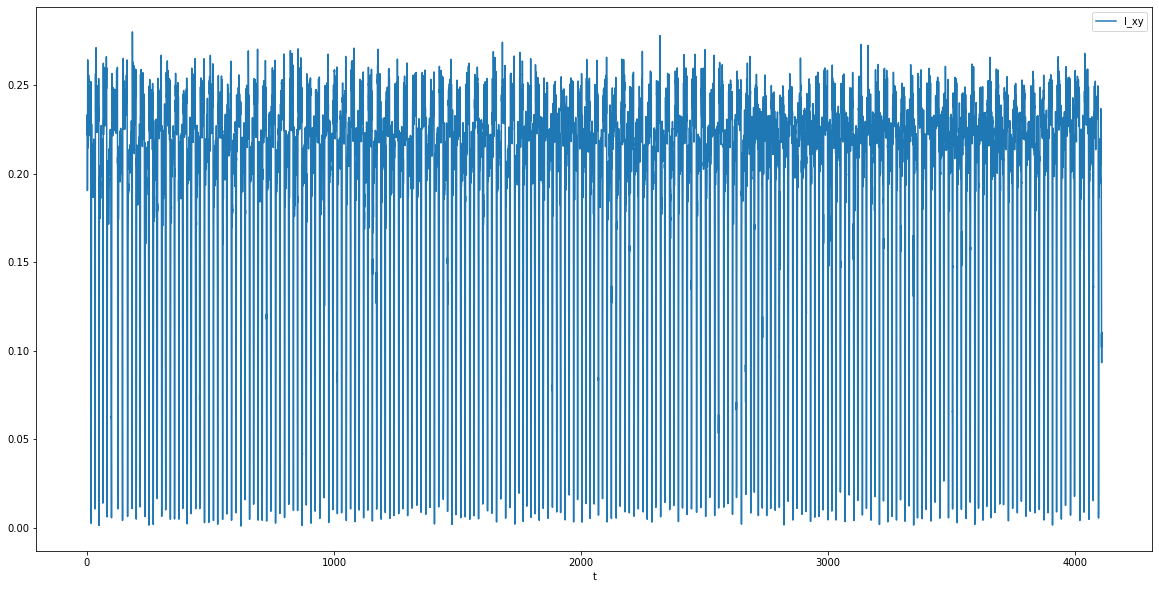

In [ ]:
Face_width=[]
for i in range(len(key_array)):
    t=key_array[i][8][3]
    l_xy=face_width(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    Face_width.append([l_xy])
    Face_width[i].append(right)
    Face_width[i].append(left)
    Face_width[i].append(t)
Face_width_ear_to_ear=np.array(Face_width) 
df_Face_width = pd.DataFrame(Face_width_ear_to_ear,columns=['l_xy','r_sdr','l_sdr','t'])
print(df_Face_width)
df_Face_width.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))

df_forward=df_Face_width[df.r_sdr < df.l_sdr] 
df_backward=df_Face_width[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

forward_face_width_avrg=avrg_value(forward_instants,0.3,0.90)
backward_face_width_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_face_width_avrg)
print (backward_face_width_avrg)

face_width_forward=list((map(lambda a : np.mean(a), forward_face_width_avrg[plus::2])))
face_width_backward=list((map(lambda a : np.mean(a),backward_face_width_avrg[minus::2])))
print(face_width_forward)
print('\n')
print(face_width_backward)

S14=comb_dir_arrays(face_width_forward,face_width_backward,plus,minus)
print (S14)
print (len(S14))
S_f[8]=S14
print(S_f)


## fs15 Mouth width

           l_xy     r_sdr     l_sdr            t
0      0.094751  0.543409  0.595587     0.724078
1      0.095078  0.543842  0.595584     0.825904
2      0.095342  0.544403  0.595657     0.928155
3      0.095221  0.545330  0.595792     1.025161
4      0.094238  0.545776  0.596032     1.117545
...         ...       ...       ...          ...
41281  0.031991  0.579938  0.532675  4107.176623
41282  0.030060  0.575158  0.528326  4107.263378
41283  0.034809  0.573037  0.526198  4107.351717
41284  0.035130  0.572638  0.526157  4107.436967
41285  0.034977  0.572066  0.525584  4107.518179

[41286 rows x 4 columns]


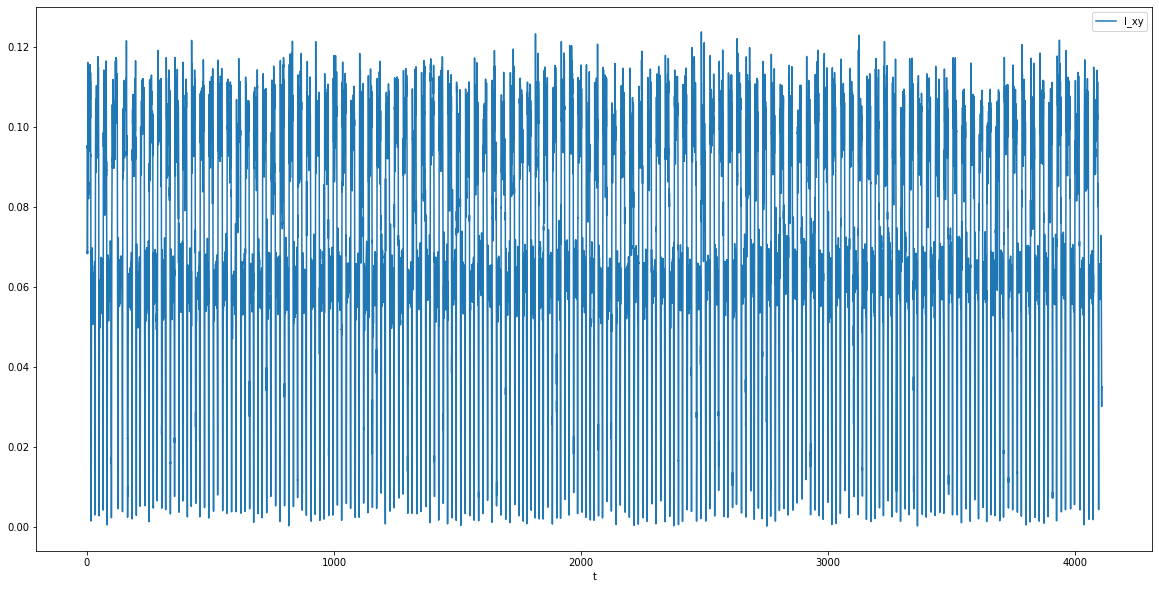

In [ ]:
mouth=[]
for i in range(len(key_array)):
    t=key_array[i][9][3]
    l_xy=mouth_width(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    mouth.append([l_xy])
    mouth[i].append(right)
    mouth[i].append(left)
    mouth[i].append(t)
mouth_width=np.array(mouth) 
df_mouth = pd.DataFrame(mouth_width,columns=['l_xy','r_sdr','l_sdr','t'])
print(df_mouth)
df_mouth.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))

df_forward=df_mouth[df.r_sdr < df.l_sdr] 
df_backward=df_mouth[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

forward_mouth_avrg=avrg_value(forward_instants,0.3,0.90)
backward_mouth_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_mouth_avrg)
print (backward_mouth_avrg)

mouth_forward=list((map(lambda a : np.mean(a), forward_mouth_avrg[plus::2])))
mouth_backward=list((map(lambda a : np.mean(a),backward_mouth_avrg[minus::2])))
print(mouth_forward)
print('\n')
print(mouth_backward)

S15=comb_dir_arrays(mouth_forward,mouth_backward,plus,minus)
print (S15)
print (len(S15))
S_f[9]=S15
print(S_f)


## fs16Eye size

           l_xy     r_sdr     l_sdr            t
0      0.042543  0.543409  0.595587     0.724078
1      0.038824  0.543842  0.595584     0.825904
2      0.038833  0.544403  0.595657     0.928155
3      0.038741  0.545330  0.595792     1.025161
4      0.041552  0.545776  0.596032     1.117545
...         ...       ...       ...          ...
41281  0.033576  0.579938  0.532675  4107.176623
41282  0.031525  0.575158  0.528326  4107.263378
41283  0.035819  0.573037  0.526198  4107.351717
41284  0.036947  0.572638  0.526157  4107.436967
41285  0.036676  0.572066  0.525584  4107.518179

[41286 rows x 4 columns]


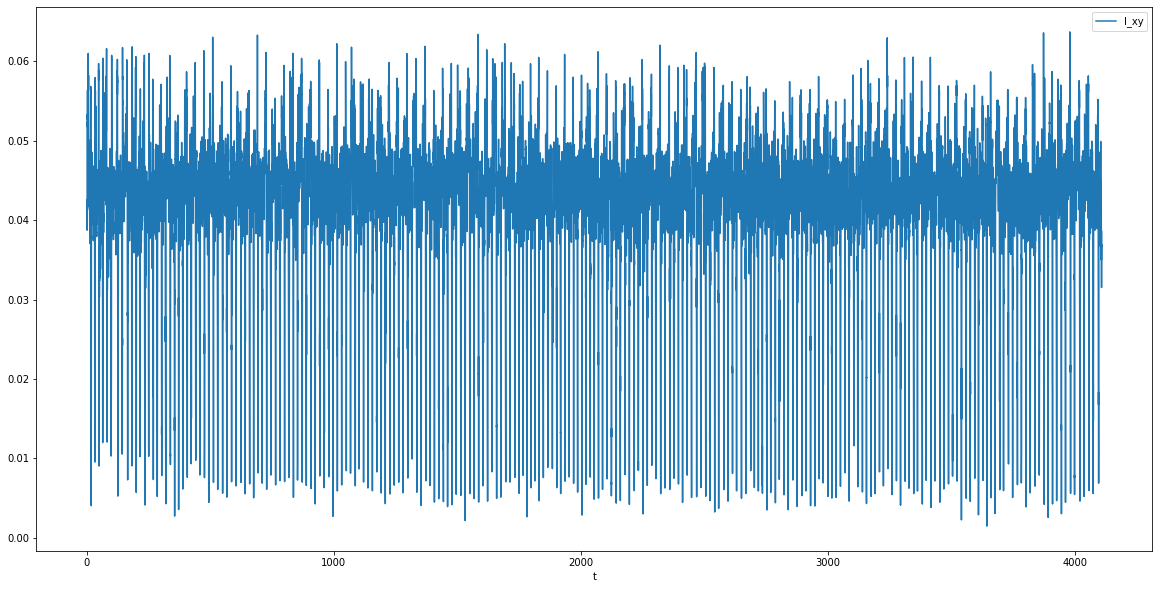

In [ ]:
eye=[]
for i in range(len(key_array)):
    t=key_array[i][6][3]
    l_xy=eye_size(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    eye.append([l_xy])
    eye[i].append(right)
    eye[i].append(left)
    eye[i].append(t)
eye_width=np.array(eye) 
df_eye = pd.DataFrame(eye_width,columns=['l_xy','r_sdr','l_sdr','t'])
print(df_eye)
df_eye.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))

df_forward=df_eye[df.r_sdr < df.l_sdr] 
df_backward=df_eye[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

forward_eyes_avrg=avrg_value(forward_instants,0.3,0.90)
backward_eyes_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_eyes_avrg)
print (backward_eyes_avrg)

eyes_forward=list((map(lambda a : np.mean(a), forward_eyes_avrg[plus::2])))
eyes_backward=list((map(lambda a : np.mean(a),backward_eyes_avrg[minus::2])))
print(eyes_forward)
print('\n')
print(eyes_backward)

S16=comb_dir_arrays(eyes_forward,eyes_backward,plus,minus)
print (S16)
print (len(S16))
S_f[10]=S16
print(S_f)
    

## fs17-Distance between eyes Midpoints

           l_xy     r_sdr     l_sdr            t
0      0.112103  0.543409  0.595587     0.724078
1      0.111797  0.543842  0.595584     0.825904
2      0.112553  0.544403  0.595657     0.928155
3      0.112005  0.545330  0.595792     1.025161
4      0.111487  0.545776  0.596032     1.117545
...         ...       ...       ...          ...
41281  0.047748  0.579938  0.532675  4107.176623
41282  0.045736  0.575158  0.528326  4107.263378
41283  0.055488  0.573037  0.526198  4107.351717
41284  0.057472  0.572638  0.526157  4107.436967
41285  0.057325  0.572066  0.525584  4107.518179

[41286 rows x 4 columns]


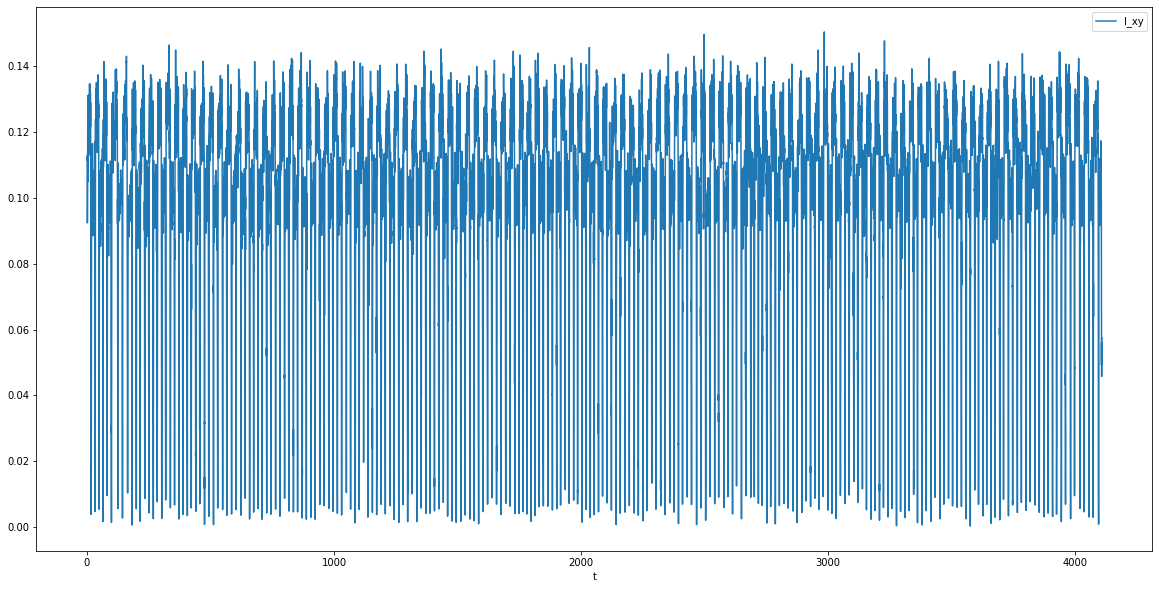

In [ ]:
eyes_mid=[]
for i in range(len(key_array)):
    t=key_array[i][5][3]
    l_xy=eyes_midpoints(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    eyes_mid.append([l_xy])
    eyes_mid[i].append(right)
    eyes_mid[i].append(left)
    eyes_mid[i].append(t)
eyes_mid_width=np.array(eyes_mid) 
df_eyes_mid = pd.DataFrame(eyes_mid_width,columns=['l_xy','r_sdr','l_sdr','t'])
print(df_eyes_mid)
df_eyes_mid.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))

df_forward=df_eyes_mid[df.r_sdr < df.l_sdr] 
df_backward=df_eyes_mid[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

forward_eyes_mid_avrg=avrg_value(forward_instants,0.3,0.90)
backward_eyes_mid_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_eyes_mid_avrg)
print (backward_eyes_mid_avrg)

eyes_mid_forward=list((map(lambda a : np.mean(a), forward_eyes_mid_avrg[plus::2])))
eyes_mid_backward=list((map(lambda a : np.mean(a),backward_eyes_mid_avrg[minus::2])))
print(eyes_mid_forward)
print('\n')
print(eyes_mid_backward)

S17=comb_dir_arrays(eyes_mid_forward,eyes_mid_backward,plus,minus)
print (S17)
print (len(S17))
S_f[11]=S17
print(S_f)

    

In [ ]:
output = open('para_values/{}.pkl'.format(name), 'wb')
pickle.dump(T_f, output)
output.close()